# Profitable Apps in the App Store and Google Play Markets

The purpose for this project is to find mobile apps that are the most profitable from both the App Store and the Google Play markets. As a data analyst working for a company that builds mobile apps, our goal is to help our developers make data-driven decisions that will influence what type of apps they make.

The company only creates apps that are free to download, with our main source of revenue coming from in-app ads. Our revenue is affected by the number of users that use our apps and our main goal is to help assist our developers in understanding which types of apps attract the most users.

## Opening and Exploring Data

As of 2021, there are approximately 2 million iOS apps available on the App Store, and over 3.4 million Android apps on Google Play Store.

Collecting data for more than five million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data for free. 

* A dataset containing data about approximately ten thousand Android apps from Google Play. Dataset can be downloaded from this [link](https://www.kaggle.com/lava18/google-play-store-apps).
* A dataset containing data about approximately seven thousand iOS apps from the App Store. Dataset can be downloaded from this [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

We can start by downloading and opening the two data sets and then we can explore the data.

#### I.) Opening Dataset

Using a function called **open_file()** we can open files easier and slice the dataset to show all apps minus the header row.

In [2]:
from csv import reader

def open_file(file):
    opened_file = open(file, encoding='utf8')
    read_file = reader(opened_file)
    convert_list = list(read_file)
    return convert_list

## Android Dataset ##

android = open_file('C:/Users/grega/Desktop/Datasets/googleplaystore.csv')
android_header = android[0]
android_apps = android[1:]

## iOS Dataset ##

ios = open_file('C:/Users/grega/Desktop/Datasets/AppleStore.csv')
ios_header = ios[0]
ios_apps = ios[1:]



#### II.) Exploring Dataset

We can make our job easier by making a reusable function called **explore_data()** that we can use to view however many rows we want to see, we also include the option to see the total number of rows and columns for a dataset.

In [2]:
# using a conditional as a parameter allows us to have an optional condition such as if we want to see number of rows or columns 

## Android apps Dataset ##

def explore_data(dataset, rows, rows_columns = False): 
    total_rows = dataset[:rows]
    for row in total_rows: 
        print(row)
        print('\n') # this adds an empty space between rows, so we see it better
    
    if rows_columns == True:
        print('# of rows:', len(dataset))
        print('# of columns:', len(dataset[0]))

# Example function

print(android_header)
print('\n')
explore_data(android_apps,2,True)


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


# of rows: 10841
# of columns: 13


Exploring the Android Apps dataset we see that it has 10,841 apps with 13 columns. The columns that will most likely help us in our analysis are 'App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

In [3]:
## iOS App Dataset ##

print(ios_header)
print('\n')
explore_data(ios_apps,2,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


# of rows: 7197
# of columns: 16


The iOS apps dataset shows that it has 7197 apps and 16 columns. Some notable columns include 'track name', 'price', 'rating_count_tot', 'user_rating', and 'prime_genre'. Details about each column can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## Data Cleaning

#### I.) Remove Wrong Data

To fit the purposes of our analysis we must clean the data to fit our specifications and scope of our problem before we can make conclusions. We have to remove or correct wrong data, remove duplicate data, and remove apps that are not free.

First lets see if there are any errors within the dataset by checking if the rows are accurate for the apps by checking it against the header.

In [35]:
print(android_header)
print('\n')
print(len(android_header)) # of columns is 13
print('\n')

# for each row in android_apps if the lenght of the row is not equal to length of our header --
# print the row and index number for the row that meets the criteria

for row in android_apps:    
    if len(row) != len(android_header):
        print(row)
        print('\n')
        print("Index number:", android_apps.index(row))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


13


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


We see the row with an error is indexed at 10472. Lets print this so we can see what column is missing for this app.

In [5]:
print(android_apps[10472])
print('\n')
print(android_header)

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


We delete this row so that it won't affect the accuracy of our analysis using the del function. We only want to use this function once because it will delete other rows.

In [6]:
print(len(android_apps))
del android_apps[10472] # run once
print(len(android_apps))

10841
10840


#### II.) Identify Duplicate Entries

Some other common errors we see in datasets are duplicate entries, such as this app:

In [7]:
for row in android_apps:
    app_name = row[0]         # app name is indexed at 0 for the rows
    if app_name == 'Instagram':
        print(i)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


To check if our dataset contains duplicate entries we can create two lists to store duplicate apps and unique apps. We can then loop through the dataset to run a conditional statement that states that if an app's name is in our **unique_apps** list it is added to the **duplicate_apps** list instead. If it is not, then it is added to the **unique_apps** list. This method would allow us to see which apps have duplicates. 

In [8]:
duplicate_apps = []
unique_apps = []

for row in android_apps:
    app_name = row[0]
    if app_name in unique_apps:
        duplicate_apps.append(app_name)
    else:
        unique_apps.append(app_name)
        
print('# of duplicate apps:', len(duplicate_apps))
print('\n')
print('Sample duplicate apps:', duplicate_apps[:15])


# of duplicate apps: 1181


Sample duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We need to find a way to remove the duplicates in the dataset and keep only one entry for each. A good way to do this is to look at the number of reviews for an app, based on this information we know that the app with the highest number of reviews is the most recent one and also has a more accurate rating, we can use this criteria to delete duplicates.

#### III.) Remove Duplicate Entries

We first find the expected length of our dataset by subtracting the length of the dataset to the number of duplicate apps, we will check this number against our dictionary and if the numbers are the same we have successfully contained the apps with the highest number of reviews.

*Creating a dictionary with each key as a unique app name and the dictionary values are the highest number of reviews*

* Assign app name and number of reviews to **name** (row in apps indexed at 0) and **n_reviews** (row in apps indexed at 3 converted to a float).
* If the name of our app is not in our dictionary **reviews_max** a new entry in the dictionary is created where the key is the app name and the value is the number of reviews.
* If the name is in our dictionary and the key-value pair is less than the number of reviews for apps of the same name, the number of reviews will be updated to the one with a higher number.

In [9]:
print('Expected Length:',len(android_apps)-len(duplicate_apps)) 
    
reviews_max = {}

for row in android_apps:
    name = row[0]
    n_reviews = float(row[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print('Actual Length:',len(reviews_max))


Expected Length: 9659
Actual Length: 9659


We will use the **reviews_max** dictionary to remove duplicate entries and keep those with the highest number of reviews.

* Create two empty lists **android_clean** and **already_added**
* We iterate through the android dataset and for every iteration:
    * We assign app name and number of reviews to **name** and **n_reviews**
    * We add the current row to **android_clean** and app name to **already_added** list if:
        * The number of reviews matches the number in the dictionary.
        * The name is not already in the **already added** list, this is to account for some apps that are duplicate and have the same number of reviews as each other, therefore the condition of highest number of reviews won't apply. 
    

In [10]:
android_clean = []
already_added = []

for row in android_apps:
    name = row[0]
    n_reviews = float(row[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(row)
        already_added.append(name)
        
explore_data(android_clean, 2, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


# of rows: 9659
# of columns: 13


Exploring the dataset we see that we have 9659 rows, just as we expected.

In [11]:
ios_unique = []
ios_duplicate = []

for row in ios_apps:
    ios_id = row[0]
    if ios_id in ios_unique:
        ios_duplicate.append(ios_id)
    else:
        ios_unique.append(ios_id)
        
print(len(ios_duplicate))

0


Looking at the id number of the ios apps dataset, we see that there are no duplicate apps, so we can leave this dataset alone.

## Removing Non-English Apps
#### I.) Identifying Apps to Remove

Looking at both datasets we can see that some apps are not meant for English-speaking audiences, as we can see below:

In [12]:
print(ios[814][1])
print(ios[6732][1])
print('\n')
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜


中国語 AQリスニング
لعبة تقدر تربح DZ


For the purpose of this project we're not interested in these apps, so we'll remove them. We cans tart by removing all apps that contain symbols not commonly used in English text. English text contains the alphanumeric characters as well as some special symbols such as punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).


Each character we use in a string has a corresponding number associated with it. The corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. The numbers corresponding to the characters we commonly use in an English text range from 0 to 127 according to the ASCII (American Standard Code for Information Interchange) system as shown below.

In [13]:
print(ord('a'))
print(ord('A'))
print(ord('爱'))

97
65
29233


We can build a function by filtering out criteria that is outside the ASCII standard and checks whether each app name contains non-ASCII characters. The built-in **ord()** function tells us each character's encoding number. Any number greater than 127 will be considered non-english character apps.

In [14]:
def english_char(string): # put string in quotation marks
   
    for character in string:
        
        if ord(character) > 127:
            return False
    return True

print(english_char('Instagram'))
print(english_char('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_char('Docs To Go™ Free Office Suite'))
print(english_char('Instachat 😜'))

True
False
False
False


#### II.) Removing Non-English Apps

For our purposes we can now see that for the most part, non-english apps are caught by our filter. Some app names, such as ones with emojis or superscripts get past our filter, we should update our function to check if more than one of the characters in the app name is over 127 then it is most likely non-english.

In [15]:
def english_char(string):
    counter = 0
    
    for character in string:
        if ord(character) > 127:
            counter += 1
    
    if counter > 3:
        return False
    return True
    
print(english_char('Instagram'))
print(english_char('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_char('Docs To Go™ Free Office Suite'))
print(english_char('Instachat 😜'))
        

True
False
True
True


Lets use this function **english_char()**  to clean the datasets.

In [16]:
# android dataset = android_clean ; ios dataset = ios_apps

android_eng = []
ios_eng = []

for row in android_clean:
    name = row[0]
    if english_char(name) == True:
        android_eng.append(row)

for row in ios_apps:
    name = row[1]   
    if english_char(name) == True:
        ios_eng.append(row)
        

explore_data(android_eng,2,True)
print('\n')
explore_data(ios_eng,2,True)
print('\n')

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


# of rows: 9614
# of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


# of rows: 6183
# of columns: 16




We can see that we're left with 9614 Android apps and 6183 iOS apps.

## Removing Non-Free Apps

The purpose of this project is to find meaningful insights on apps that are free to download and install because our main revenue is through in-app ads. Since our datasets contain both free and paid apps, we need to remove the paid apps for our analysis.

In [17]:
print(android_header)
print('\n')
print(ios_header)
print('\n')

explore_data(android_eng,1,True)
print('\n')
explore_data(ios_eng,1,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


# of rows: 9614
# of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


# of rows: 6183
# of columns: 16


Based on our headers, for the android dataset we need to look at the price column, indexed at 7 and for the ios dataset we need to look at column indexed at 4. 

Looking at the two datasets, for the android dataset we see that free apps are a string `'0'` and for the ios dataset `'0.0'`.

In [18]:
# previous datasets: android dataset = android_eng ; ios dataset ios_eng

android_final = []
ios_final = []

for row in android_eng:
    price = row[7]
    
    if price == '0':
        android_final.append(row)
        
for row in ios_eng:
    price = row[4]
    
    if price == '0.0':
        ios_final.append(row)
        
explore_data(android_final,3,True)
print('\n')
explore_data(ios_final,3,True)
print('\n')

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


# of rows: 8864
# of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '

## Most Common Apps by Genre


Now that we cleaned our dataset, we can now move on to analyzing the type of apps that are likely to attract more users as that affects our revenue.

To minimize risks and expenses, our validation strategy for an app includes:
* Building an Android version of the app and add it to Google Play Store.
* If the app has good response from users, we improve it further.
* If the app is profitable within 6 months, we build an iOS version of the app and add it to the App Store.

Our main goal is to add the app on both Google Play and App Store, we need to find apps that are successful in both markets. An example for this could be a lifestyle app that tracks steps walked in a day.

We can start by looking at the most common genres for each market. We will build a frequency table for the `prime_genre` column of the App Store dataset (indexed at 11) and the `Genres` and `Category` column in the Google Play dataset (indexed at 9 and 1 respectively). We will use the two columns on the Google Play dataset to see which one is more condensed for our purposes. 

We will create two functions: 
* A function to create a frequency table that will show percentages for each genre.
* A function to sort the frequency table in a descending order.

In [19]:
# android_final, ios_final

def freq_table(dataset, index):
    freq_list = {}
    
    for row in dataset:
        genre = row[index]
        if genre in freq_list:
            freq_list[genre] += 1
        else:
            freq_list[genre] = 1
   
    total_value = sum(freq_list.values())
    
    for key in freq_list:
        freq_list[key] /= total_value
        freq_list[key] *= 100
        
    return freq_list

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

Lets examine the `prime_genre` column of the App Store dataset.

In [20]:
display_table(ios_final, 11)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see from the frequency table that over half of the apps are games at (58.16%). Entertainment apps at about 8%, next are photo and video apps, which are approximately 5%. And only about 3.66% of the apps are created for education, followed by social networking apps which is around 3.29% of the apps in our data set.

The conclusion that we can derive from the data is that the App Store, for the most part, (The apps we are looking at are free and the audience is catered to native English speakers ) consist mostly of apps that are designed for entertainment purposes such as: games, entertainment, photo and video, social networking, etc., while there are less apps with more practical purposes (education, productivity, lifestyle, etc.). However, we cannot conclude that since most apps are geared towards entertainment that it will also have the same number of users, the demand might not equal its supply.

Next we will examine the `Genres` and `Category` columns of the Google Play Store dataset, which seem to be related.

In [21]:
display_table(android_final, 1) # Category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

Looking at this we can conclude that difference between the two datasets, there are not as many apps for entertainment in the Google Play Store, and we see more apps for practical purposes such as (Family, Tools, Business, Lifestyle, and Productivity). Looking further we can see that the Family category is filled with game apps for children.

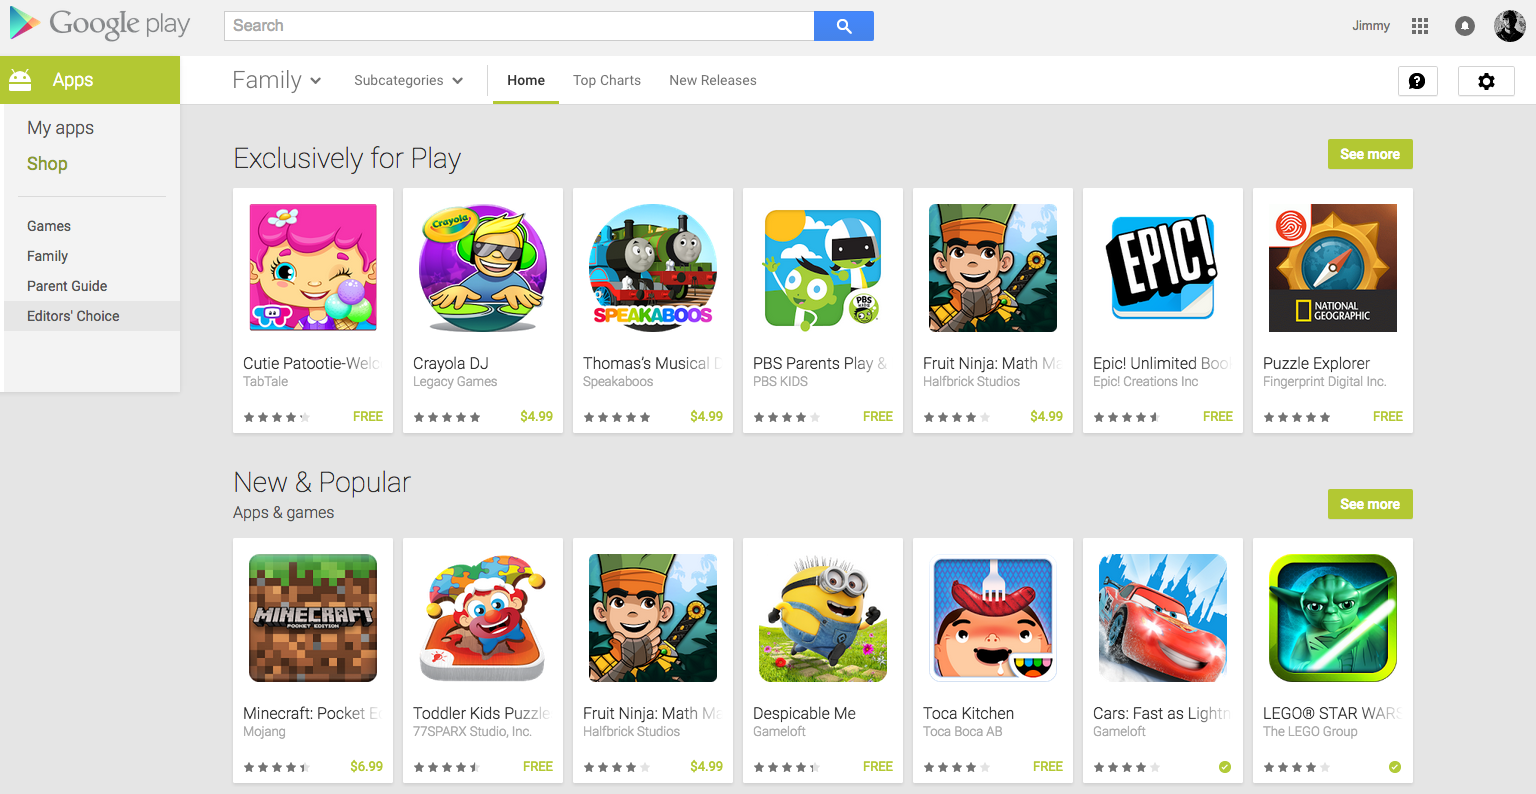

However, practical apps are represented better in the Google Play Store compared to the App Store. We can see this in the `Genres` column:

In [22]:
display_table(android_final, 9) # Genres

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the `Genres` and the `Category` columns seems to be the amount of detail, for example `Genres` divides all of the games into different subcategories such as (strategy;education, strategy;Creativity, etc.) but all seem to fall under the Family and Game Section of the `Category` column. For our purposes we will use the `Category` column because it is more condensed. 

So far we found that the majority of App Store apps is designed for entertainment, while Google Play portrays a balance between practical and entertainment apps. Lets look at the kind of apps that have the most users.

## Most Popular Apps by Genre on the App Store

One way we can find out to find which genres are the most popular (have the most users) is to calculate the average number of installs per genre. Both datasets have different ways we can find this information, in the Google Play Store we have a column that is `Installs`, but in the App Store we can use the total number of user ratings `rating_count_tot` (indexed at 5) instead because it does not have an install column. 

Here we can calculate the average number of user ratings per app genre:

In [23]:
ios_table = freq_table(ios_final, 11) # frequency of ratings per genre (genre : freq)
output = {}

for key in ios_table:
    total_ratings = 0
    total_apps = 0
    
    for row in ios_final:
        genre_app = row[11]
        if genre_app == key:
            user_ratings = float(row[5])
            total_ratings += user_ratings
            total_apps += 1
    
    avg_ratings = total_ratings / total_apps
    output[key] = avg_ratings
    
# Sort dictionary by descending order of values
import operator

sorted_output = dict(sorted(output.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_output)

# This would give us average ratings per app genre in a descending order



{'Navigation': 86090.33333333333, 'Reference': 74942.11111111111, 'Social Networking': 71548.34905660378, 'Music': 57326.530303030304, 'Weather': 52279.892857142855, 'Book': 39758.5, 'Food & Drink': 33333.92307692308, 'Finance': 31467.944444444445, 'Photo & Video': 28441.54375, 'Travel': 28243.8, 'Shopping': 26919.690476190477, 'Health & Fitness': 23298.015384615384, 'Sports': 23008.898550724636, 'Games': 22788.6696905016, 'News': 21248.023255813954, 'Productivity': 21028.410714285714, 'Utilities': 18684.456790123455, 'Lifestyle': 16485.764705882353, 'Entertainment': 14029.830708661417, 'Business': 7491.117647058823, 'Education': 7003.983050847458, 'Catalogs': 4004.0, 'Medical': 612.0}


After sorting the results in a descending order, we find that Navigation genre apps, on average, have the highest amount of user reviews, followed by reference and social networking genres.

Looking at the Navigation apps:

In [24]:
# counter

total_apps = 0

for row in ios_final:
    genre = row[11]
    app = row[1]
    total_reviews = row[5]
    if genre == 'Navigation':
        print(app,':',total_reviews)
        total_apps += 1

print('\n')
print('Total apps:',total_apps)


Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Total apps: 6


After looking at the apps, we see that Navigation genre is skewed by Waze and Google Maps, that have over 500k user reviews. This can inflate the app genre to being more popular than it truly is by just two apps with the majority of reviews from the 6 total apps. 

Looking at social networking apps:

In [25]:
# counter
total_apps = 0

for row in ios_final:
    genre = row[11]
    app = row[1]
    total_reviews = row[5]
    if genre == 'Social Networking':
        print(app,':',total_reviews)
        total_apps += 1

print('\n')
print('Total Apps:', total_apps)

Facebook : 2974676
Pinterest : 1061624
Skype for iPhone : 373519
Messenger : 351466
Tumblr : 334293
WhatsApp Messenger : 287589
Kik : 260965
ooVoo – Free Video Call, Text and Voice : 177501
TextNow - Unlimited Text + Calls : 164963
Viber Messenger – Text & Call : 164249
Followers - Social Analytics For Instagram : 112778
MeetMe - Chat and Meet New People : 97072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90414
InsTrack for Instagram - Analytics Plus More : 85535
Tango - Free Video Call, Voice and Chat : 75412
LinkedIn : 71856
Match™ - #1 Dating App. : 60659
Skype for iPad : 60163
POF - Best Dating App for Conversations : 52642
Timehop : 49510
Find My Family, Friends & iPhone - Life360 Locator : 43877
Whisper - Share, Express, Meet : 39819
Hangouts : 36404
LINE PLAY - Your Avatar World : 34677
WeChat : 34584
Badoo - Meet New People, Chat, Socialize. : 34428
Followers + for Instagram - Follower Analytics : 28633
GroupMe : 28260
Marco Polo Video Walkie Talkie : 27662
Miitomo : 2

Our goal is to see the most popular apps by genre. Although some genres might seem more popular than they are because of big-name apps skewing the data (such as navigation genre or music genre), we can always remove data that skews the average user reviews for a more accurate portrayal of popular genres.

We can also look at popular genres (based on total reviews) that have a decent spread, such as social networking. Even if the genre has apps like Facebook or Pinterest that have over 4M reviews total, by looking at the spread we can see that even the less popular apps have over 100K reviews, meaning that the genre is relatively popular. 

An app that is based off of combined popular features of other top apps within the genre could lead to a high amount of users. Since most social networking apps are designed for consumption (based on 2020 data, social media app users average about 2.5 hours per day on social media), our users will most likely spend alot of time on the app and we can make a profit using in-app ads. 

Some popular features of top social media apps:
* Customization of individual profiles
* Ability to increase user following
* Privacy and Security
* Messaging and Video features
* Explore page to discover topics of interest
* Meeting people

To standout from the other popular social media apps, we can take a feature from  another popular feature  of social networking apps. Aside from app features that mostly use communication or discovering other users/interesting topics, the ability to meet people is underutilized. Looking at the app list above we see that a good amount is used for meeting new people or dating. We can implement these features for our social media app to not only connect and explore topics of interest but to also meet people that share the same values and have similar interests. 

Lets look at the Google Play market.

## Most Popular Apps by Genres on Google Play

For the Google Play market, we have data on the number of installs, we can get a clearer picture on the popularity of each genre based on the number of installs. The only caveat being that the values are mostly open-ended (100+, 1,000+, 5,000+, etc.):

In [27]:
display_table(android_final, 5)

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


A problem we can see with this data is that the number of installs is not precise. For example, since the range of numbers jumps from 100,000+ installs to 500,000+ , we don't have a precise way to see if the number of installs is 150,000 or 400,000. For our purposes, however, we don't need a very accurate portrayal of number of installs, we only want to see how popular a certain genre is.

We will assume the number of installs as they are (100,000+ has 100,000 installs and so on).

To perform the necessary computations we must convert the numbers to a `float` otherwise an error will be raised. This is shown in the loop below:

In [55]:
android_table = freq_table(android_final, 1) # frequency of installs per genre (genre : freq) 
output = {}

for key in android_table:
    total = 0
    len_category = 0
    for row in android_final:
        category_app = row[1]
        if category_app == key:
            installs = row[5]
            installs = installs.replace(',', '')
            installs = installs.replace('+', '')
            total += float(installs)
            len_category += 1
            
    avg_installs = total/len_category
    output[key] = avg_installs


# Sort dictionary by descending order of values
import operator

sorted_output = dict(sorted(output.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_output)

# This would give us average installs per app genre in a descending order

{'COMMUNICATION': 38456119.167247385, 'VIDEO_PLAYERS': 24727872.452830188, 'SOCIAL': 23253652.127118643, 'PHOTOGRAPHY': 17840110.40229885, 'PRODUCTIVITY': 16787331.344927534, 'GAME': 15588015.603248259, 'TRAVEL_AND_LOCAL': 13984077.710144928, 'ENTERTAINMENT': 11640705.88235294, 'TOOLS': 10801391.298666667, 'NEWS_AND_MAGAZINES': 9549178.467741935, 'BOOKS_AND_REFERENCE': 8767811.894736841, 'SHOPPING': 7036877.311557789, 'PERSONALIZATION': 5201482.6122448975, 'WEATHER': 5074486.197183099, 'HEALTH_AND_FITNESS': 4188821.9853479853, 'MAPS_AND_NAVIGATION': 4056941.7741935486, 'FAMILY': 3695641.8198090694, 'SPORTS': 3638640.1428571427, 'ART_AND_DESIGN': 1986335.0877192982, 'FOOD_AND_DRINK': 1924897.7363636363, 'EDUCATION': 1833495.145631068, 'BUSINESS': 1712290.1474201474, 'LIFESTYLE': 1437816.2687861272, 'FINANCE': 1387692.475609756, 'HOUSE_AND_HOME': 1331540.5616438356, 'DATING': 854028.8303030303, 'COMICS': 817657.2727272727, 'AUTO_AND_VEHICLES': 647317.8170731707, 'LIBRARIES_AND_DEMO': 638

On average communication apps have the highest number of installs, at 38,456,119. This number is influenced by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts)

In [58]:
for row in android_final:
    category = row[1]
    app = row[0]
    installs = row[5]
    if category == 'COMMUNICATION' and (installs == '1,000,000,000+'
                                       or installs == '500,000,000+'
                                       or installs == '100,000,000+'):
        print(app,':',installs)

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

Looking at what happens if we remove the communications apps that have over 100 million installs. We see that the average installs is reduced by around 10 times (38M to 3.6M).

In [60]:
below_100m = []

for row in android_final:
    app = row[0]
    category = row[1]
    installs = row[5]
    installs = installs.replace(',','')
    installs = installs.replace('+','')
    installs = float(installs)
    if (category == 'COMMUNICATION') and (installs < 100000000):
        below_100m.append(installs)
        
sum(below_100m)/len(below_100m)

3603485.3884615386

For the video players category, with the second highest average number of installs at 24,727,872. The market is skewed by apps like Youtube, Google Play Movies & TV, or MX Player. One thing to note is that these app genres might seem more popular than they really are.

The game genre seems extremely popular, but looking at the apps we see that the market is oversaturated and may not be a good area to capitalize.

The `Social` and `Photography` genres seem related to each other, because of our previous insight that social media apps are popular and one of the genres that people spend the most time on, we should take a closer look at the apps in this section. Photography is one of the main features of social media apps and it makes sense that it is one of the popular categories. We can take a look at popular apps within the two categories and narrow down popular features to build into our apps.

Let's take a look at some of the apps from this genre and their number of installs:

In [71]:
output = {}

for row in android_final:
    app = row[0]
    category = row[1]
    installs = row[5]
    installs = installs.replace(',','')
    installs = installs.replace('+','')
    installs = float(installs)
    if category == 'SOCIAL': 
        output[app] = installs

# Sort dictionary by descending order of values
import operator

sorted_output = dict(sorted(output.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_output)

# This would give us average installs per app genre in a descending order

{'Facebook': 1000000000.0, 'Google+': 1000000000.0, 'Instagram': 1000000000.0, 'Facebook Lite': 500000000.0, 'Snapchat': 500000000.0, 'Tumblr': 100000000.0, 'Pinterest': 100000000.0, 'Badoo - Free Chat & Dating App': 100000000.0, 'Tango - Live Video Broadcast': 100000000.0, 'LinkedIn': 100000000.0, 'Tik Tok - including musical.ly': 100000000.0, 'BIGO LIVE - Live Stream': 100000000.0, 'VK': 100000000.0, 'ooVoo Video Calls, Messaging & Stories': 50000000.0, 'MeetMe: Chat & Meet New People': 50000000.0, 'Zello PTT Walkie Talkie': 50000000.0, 'POF Free Dating App': 50000000.0, 'SKOUT - Meet, Chat, Go Live': 50000000.0, 'TextNow - free text + calls': 10000000.0, 'LiveMe - Video chat, new friends, and make money': 10000000.0, 'HTC Social Plugin - Facebook': 10000000.0, 'Quora': 10000000.0, 'Kate Mobile for VK': 10000000.0, 'Text Me: Text Free, Call Free, Second Phone Number': 10000000.0, 'Text free - Free Text + Call': 10000000.0, 'YouNow: Live Stream Video Chat': 10000000.0, 'We Heart It': 

In [73]:
output = {}

for row in android_final:
    app = row[0]
    category = row[1]
    installs = row[5]
    installs = installs.replace(',','')
    installs = installs.replace('+','')
    installs = float(installs)
    if category == 'PHOTOGRAPHY': 
        output[app] = installs

# Sort dictionary by descending order of values
import operator

sorted_output = dict(sorted(output.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_output)

# This would give us average installs per app genre in a descending order

{'Google Photos': 1000000000.0, 'B612 - Beauty & Filter Camera': 100000000.0, 'YouCam Makeup - Magic Selfie Makeovers': 100000000.0, 'Sweet Selfie - selfie camera, beauty cam, photo edit': 100000000.0, 'Retrica': 100000000.0, 'Photo Editor Pro': 100000000.0, 'BeautyPlus - Easy Photo Editor & Selfie Camera': 100000000.0, 'PicsArt Photo Studio: Collage Maker & Pic Editor': 100000000.0, 'Photo Collage Editor': 100000000.0, 'Z Camera - Photo Editor, Beauty Selfie, Collage': 100000000.0, 'PhotoGrid: Video & Pic Collage Maker, Photo Editor': 100000000.0, 'Candy Camera - selfie, beauty camera, photo editor': 100000000.0, 'YouCam Perfect - Selfie Photo Editor': 100000000.0, 'Camera360: Selfie Photo Editor with Funny Sticker': 100000000.0, 'S Photo Editor - Collage Maker , Photo Collage': 100000000.0, 'AR effect': 100000000.0, 'Cymera Camera- Photo Editor, Filter,Collage,Layout': 100000000.0, 'LINE Camera - Photo editor': 100000000.0, 'Photo Editor Collage Maker Pro': 100000000.0, 'Motorola Cam

Aside from the big apps that skew the average (Facebook, Google+, Instagram, etc.). The major apps in social genre all have key features that we saw in the ios app store:
* Customization of individual profiles
* Ability to increase user following
* Privacy and Security
* Messaging and Video features
* Explore page to discover topics of interest
* Meeting People

Looking at the popular apps for the photography genre we see key features to improve the picture and video features of our social media app, such as:
* Photo editing
* Beauty filters
* Selfie features (utilization of the front camera)
* Photo compiler (Album, Collages, etc.)


## Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app that has the most potential to be profitable for both markets.

Although there are some big names within the social media genre of apps, there is also plenty of ways to be creative and stand out among the top apps and increase our profitability. Social media apps have the most potential in terms of usage, and amount of screentime per user. Some ways we can market our social media app is to present the app with key differentiating features from one of the top apps. For example, a social media app that has the best features of each competing feed explorer app and then combine that with photo editing, customization, or other features that is lacking from top apps.